# PRÀCTICA 2 - CLASSIFICACIÓ

1597487 | Manuel Arnau Fernández

1600123 | Alba Fernández Coronado

1605547 | Marina Palomar González

In [1]:
# Carregant les llibreries necessàries
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import collections as col
import scipy.stats as stats
import statsmodels.api as sm
import scipy.stats
import random as rand
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import LabelEncoder, StandardScaler, scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, HuberRegressor, RANSACRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score
import warnings
import time
warnings.filterwarnings("ignore")

In [2]:
# Obrint el dataset
dataset = pd.read_csv('./weatherAUS.csv')
print(f'Mida de les dades: {dataset.shape}')
dataset.info()
dataset.head()

Mida de les dades: (145460, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 1

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


No     75.839406
Yes    21.914616
Name: RainTomorrow, dtype: float64
Número NaNs:  3267


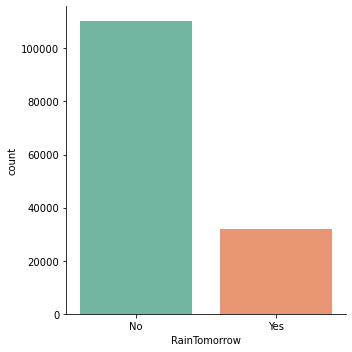

In [3]:
#Target: variable objectiu
Y = dataset['RainTomorrow']

Y.nunique() #quants tipus de valors hi ha: 2
Y.unique() #quins són els valors únics: 0, 1
print(Y.value_counts()/len(Y)*100) #percentatge de cada resposta
print("Número NaNs: ",Y.isnull().sum()) #Numero NaNs
sns.catplot(x = 'RainTomorrow', data = dataset, kind = "count", palette='Set2')


In [9]:
#Fem una copia del dataset
dataset_cp = dataset.copy()

#Eliminem les files que ocntinguin NaNs a la variable resposta
dataset_cp = dataset_cp[dataset_cp['RainTomorrow'].notna()]

# Mirem el percentatge de NanNs de cada variable
print((dataset_cp.isnull().sum()/len(dataset_cp))*100)

#eliminem les columnes amb percentatges alts de NaNs
dataset_cp = dataset_cp.drop(['Evaporation'], axis=1)
dataset_cp = dataset_cp.drop(['Sunshine'], axis=1)
dataset_cp = dataset_cp.drop(['Cloud9am'], axis=1)
dataset_cp = dataset_cp.drop(['Cloud3pm'], axis=1)

#omplim les columnes amb un percentatge mes baix amb la moda dels valors nulls de la columna
dataset_cp['MinTemp'].fillna(dataset_cp['MinTemp'].mode()[0], inplace=True)
dataset_cp['MaxTemp'].fillna(dataset_cp['MaxTemp'].mode()[0], inplace=True)
dataset_cp['Rainfall'].fillna(dataset_cp['Rainfall'].mode()[0], inplace=True)
dataset_cp['WindGustDir'].fillna(dataset_cp['WindGustDir'].mode()[0], inplace=True)
dataset_cp['WindGustSpeed'].fillna(dataset_cp['WindGustSpeed'].mode()[0], inplace=True)
dataset_cp['WindDir9am'].fillna(dataset_cp['WindDir9am'].mode()[0], inplace=True)
dataset_cp['WindDir3pm'].fillna(dataset_cp['WindDir3pm'].mode()[0], inplace=True)
dataset_cp['WindSpeed9am'].fillna(dataset_cp['WindSpeed9am'].mode()[0], inplace=True)
dataset_cp['WindSpeed3pm'].fillna(dataset_cp['WindSpeed3pm'].mode()[0], inplace=True)
dataset_cp['Humidity9am'].fillna(dataset_cp['Humidity9am'].mode()[0], inplace=True)
dataset_cp['Humidity3pm'].fillna(dataset_cp['Humidity3pm'].mode()[0], inplace=True) 
dataset_cp['Pressure9am'].fillna(dataset_cp['Pressure9am'].mode()[0], inplace=True)
dataset_cp['Pressure3pm'].fillna(dataset_cp['Pressure3pm'].mode()[0], inplace=True)
dataset_cp['Temp9am'].fillna(dataset_cp['Temp9am'].mode()[0], inplace=True)
dataset_cp['Temp3pm'].fillna(dataset_cp['Temp3pm'].mode()[0], inplace=True)
dataset_cp['RainToday'].fillna(dataset_cp['RainToday'].mode()[0], inplace=True)


# Es transformes totes les dades a numeriques

le = LabelEncoder()
dataset_cp = pd.concat([dataset_cp, pd.get_dummies(dataset.RainToday, drop_first=True, prefix='RainToday')], axis=1)
dataset_cp = dataset_cp.drop(['RainToday'], axis=1)
dataset_cp = pd.concat([dataset_cp, pd.get_dummies(dataset.RainTomorrow, drop_first=True, prefix='RainTomorroy')], axis=1)
dataset_cp = dataset_cp.drop(['RainTomorrow'], axis=1)
# dataset_cp['Year'] = dataset_cp['Date'].str.split("-", n=1).str[0].astype("int")
# dataset_cp['Month'] = dataset_cp['Date'].str.split("-", n=2).str[1].astype("int")
# dataset_cp['Day'] = dataset_cp['Date'].str.split("-", n=3).str[2].astype("int")
# dataset_cp = dataset_cp.drop(['Date'], axis=1)
# dataset_cp['Location'] = le.fit_transform(dataset_cp['Location'])
# dataset_cp['WindGustDir'] = le.fit_transform(dataset_cp['WindGustDir'])
# dataset_cp['WindDir9am'] = le.fit_transform(dataset_cp['WindDir9am'])
# dataset_cp['WindDir3pm'] = le.fit_transform(dataset_cp['WindDir3pm'])

dataset_cp.head()

Date              0.000000
Location          0.000000
MinTemp           0.447983
MaxTemp           0.226453
Rainfall          0.988797
Evaporation      42.789026
Sunshine         47.692924
WindGustDir       6.561504
WindGustSpeed     6.519308
WindDir9am        7.041838
WindDir3pm        2.656952
WindSpeed9am      0.948007
WindSpeed3pm      1.849599
Humidity9am       1.247600
Humidity3pm       2.538803
Pressure9am       9.855619
Pressure3pm       9.832411
Cloud9am         37.735332
Cloud3pm         40.152469
Temp9am           0.635756
Temp3pm           1.917113
RainToday         0.988797
RainTomorrow      0.000000
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              142193 non-null  object 
 1   Location          142193 non-null  object 
 2   MinTemp           142193 non-null  float64
 3   MaxTemp 

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

In [ ]:
# Estudi de la correlació entre els atributs
correlacio = dataset.corr()
plt.figure(figsize=(12,10))
ax = sns.heatmap(correlacio, annot=True, linewidths=.5, cmap = sns.diverging_palette(20, 220, n=200))

In [ ]:
#sns.pairplot(dataset, hue = 'RainTomorrow')

In [ ]:
(dataset.isnull().sum()/len(dataset))*100
#el que farem és que les columnes amb els percentatges mes alts de NaNs les eliminarem i les altres les omplirem